In [22]:
# import libraries
import random
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

p =  31991
A =  21906
B =  15952
j_0 =  31720
D =  -91100
T =  192
cl =  31
li =  [3, 13, 19, 23]
j-invars:  [31907, 31720, 31635, 31267, 31150, 30779, 30479, 29375, 29258, 28999, 28922, 28515, 28179, 28055, 27813, 27478, 26773, 26691, 26514, 26401, 26237, 26174, 25883, 25754, 25734, 25321, 25267, 25080, 25005, 24367, 23878, 23825, 23781, 23740, 23576, 23559, 23497, 23209, 23193, 23177, 21876, 21678, 21165, 20944, 20631, 20090, 19557, 18996, 18721, 18697, 18167, 18126, 17708, 17124, 16923, 16870, 16391, 16373, 16229, 16226, 15410, 15323, 15306, 15273, 15185, 14452, 14300, 14292, 13994, 13944, 13818, 13560, 13441, 13306, 12931, 12832, 12724, 12613, 11920, 11692, 11377, 11184, 11111, 11075, 10407, 10311, 10027, 9377, 9314, 8908, 8856, 8754, 8562, 8206, 8096, 7806, 6852, 6723, 6672, 6307, 5971, 5864, 5619, 5508, 5393, 5249, 5121, 4485, 3683, 3387, 3280, 3126, 2842, 2821, 2534, 2056, 1937, 1892, 1438, 1411, 1266, 393, 381, 9]
j_0 in j_invars  True
Swap for  3  is  [31720, 18126, 16870, 274

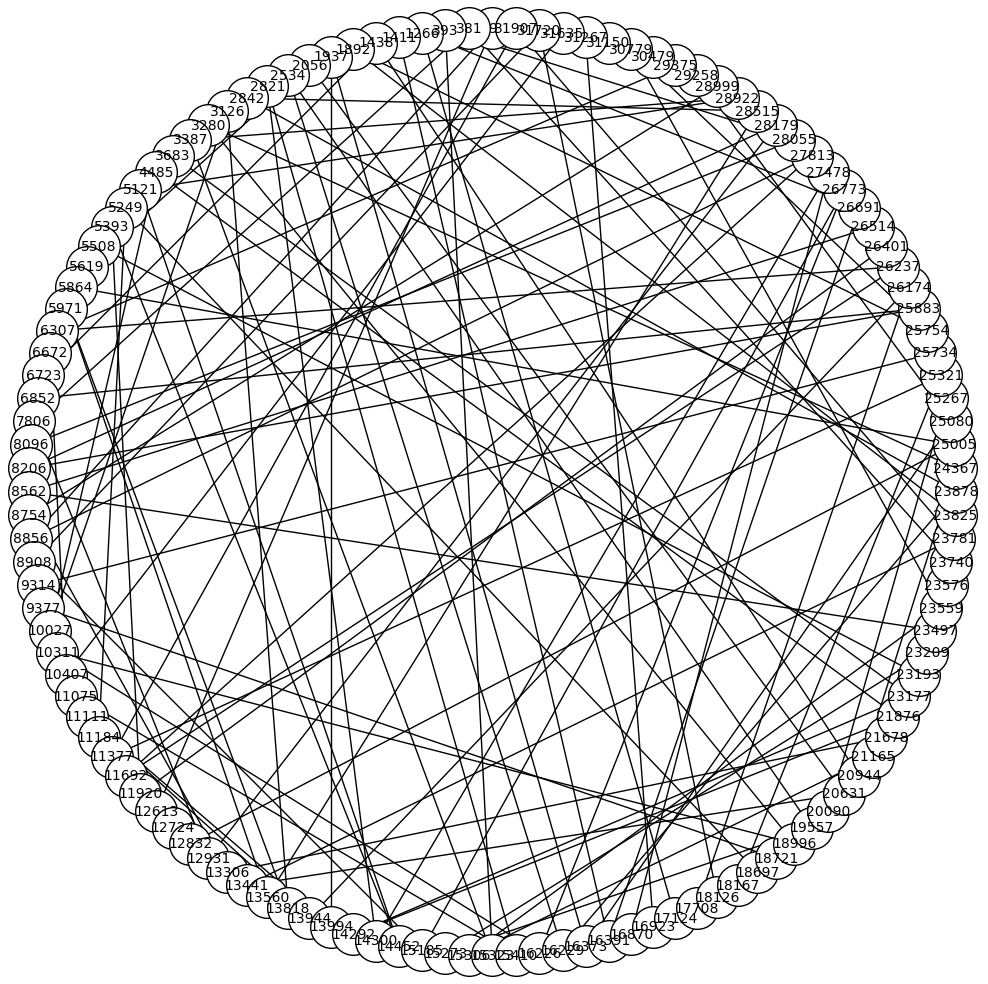

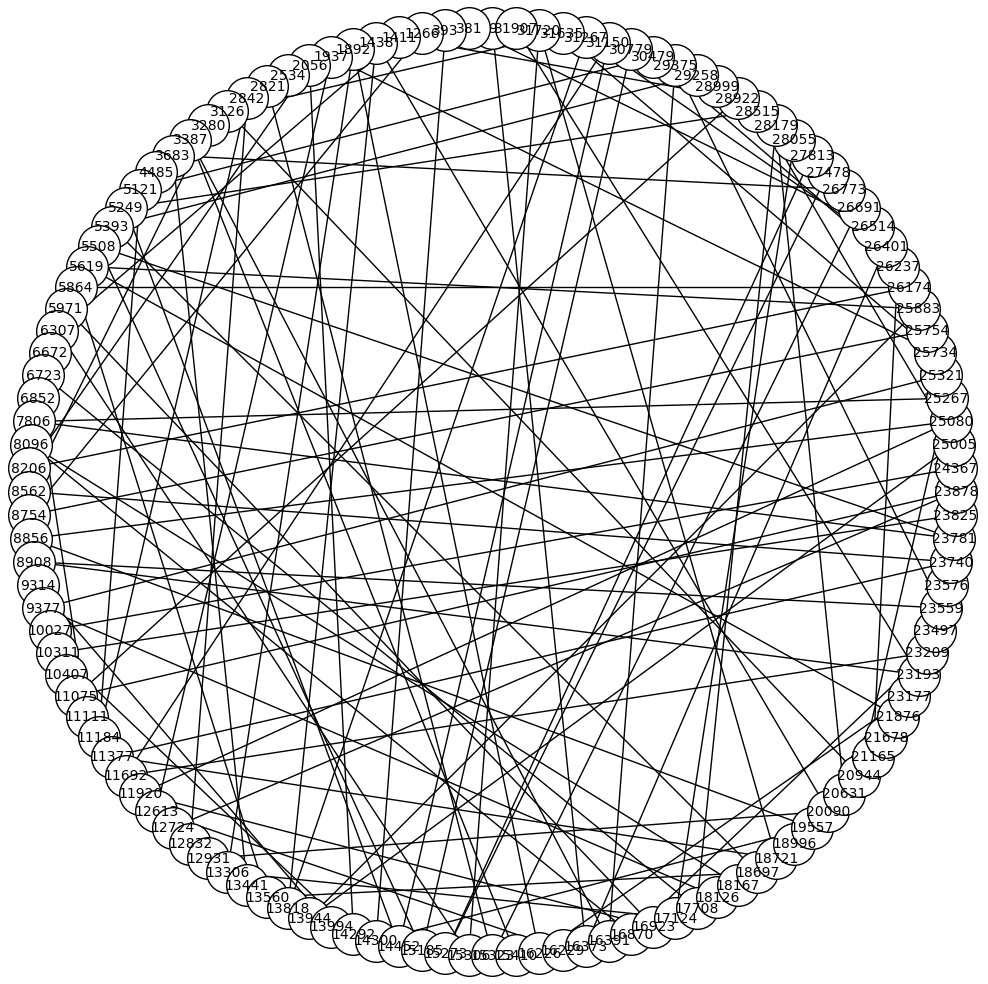

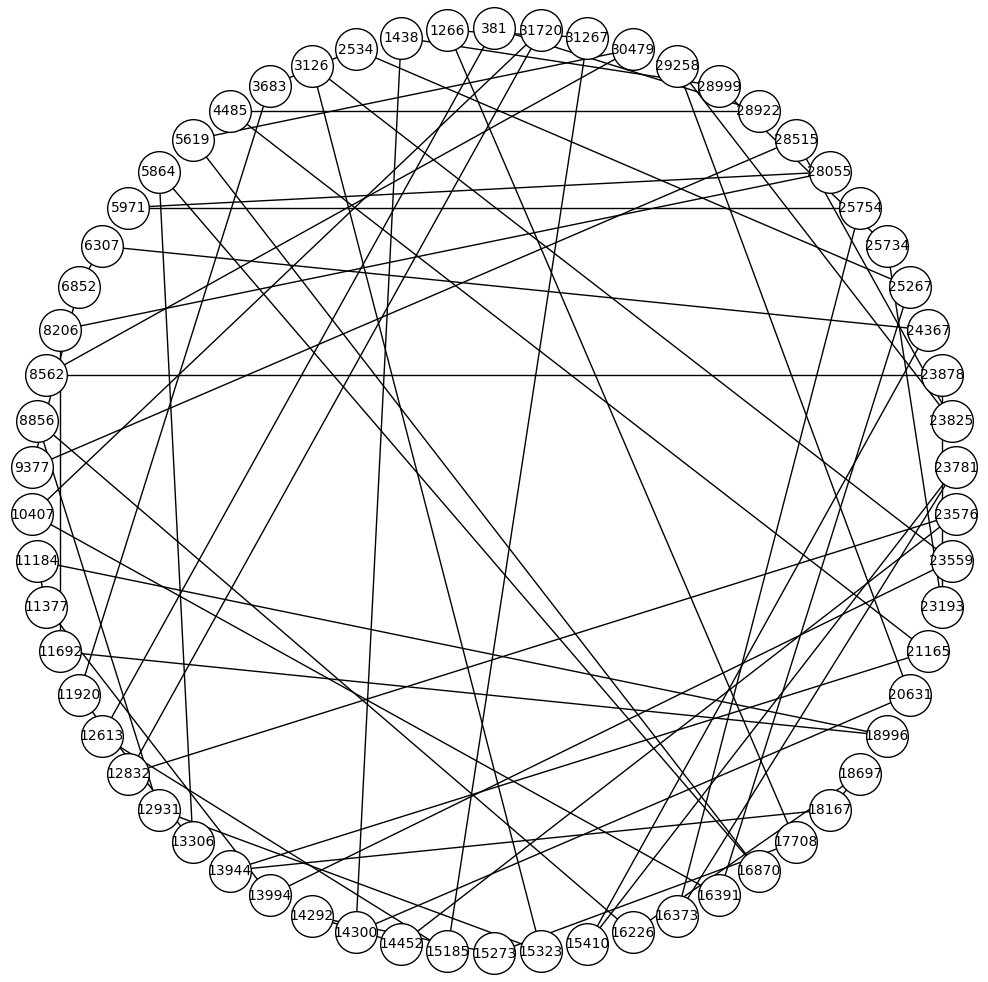

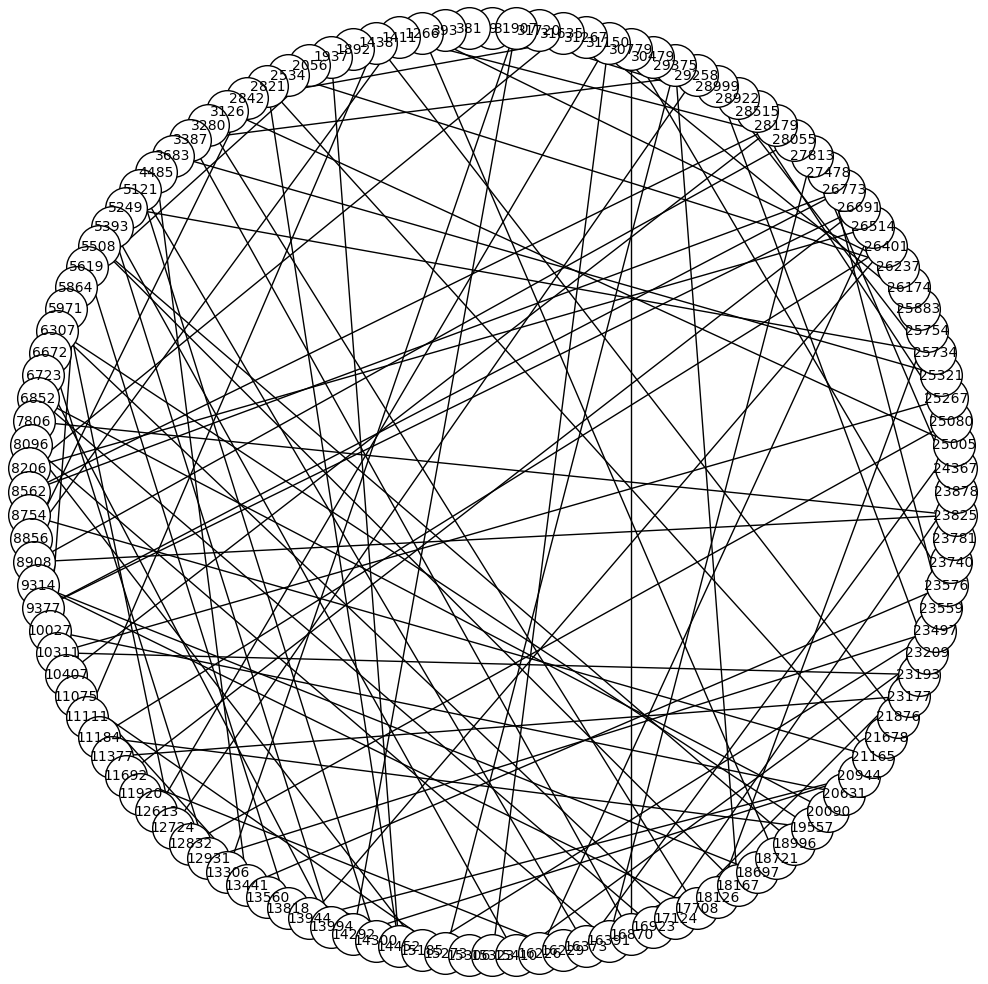

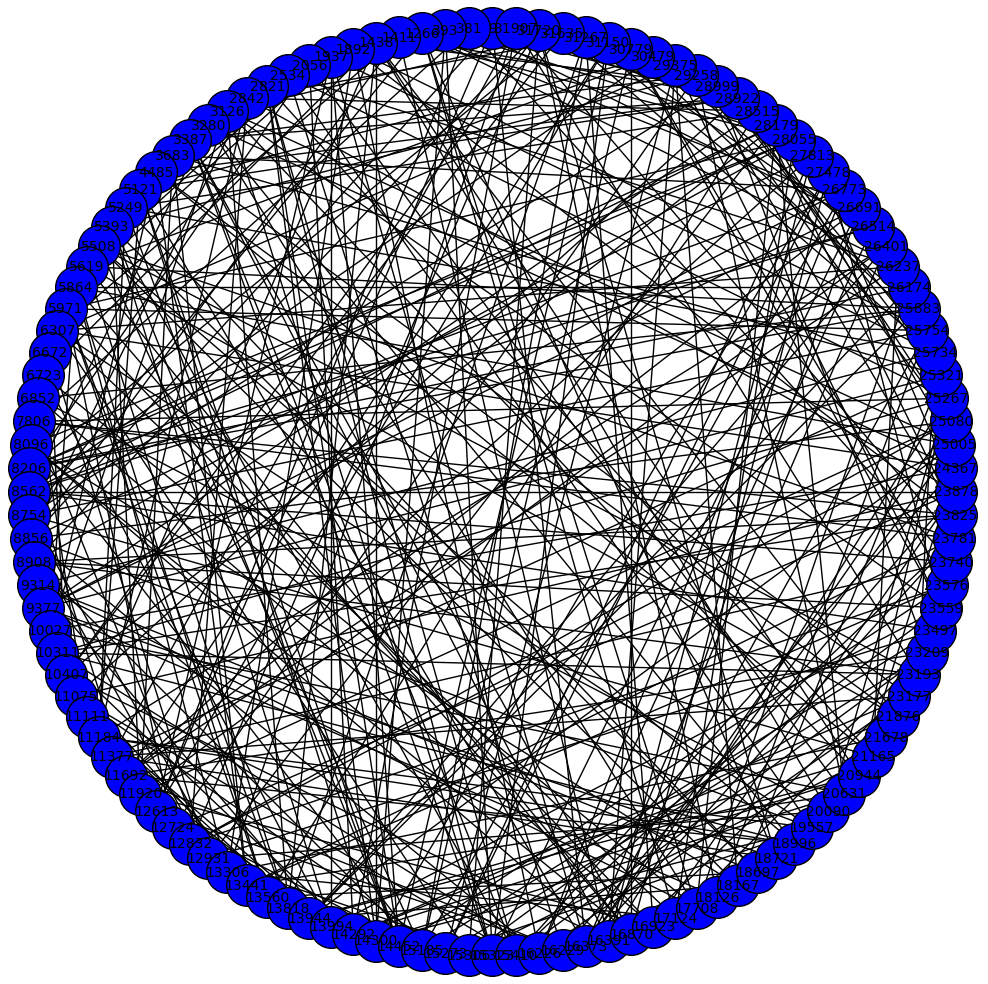

In [23]:
# Generating visualizations of nonsupersingular elliptic curves
def parameters_gen():
    while(1):
        p = next_prime(random.randint(10**4, 10**5)) 
        A = random.randint(1,p)
        B = random.randint(1,p)
        E = EllipticCurve(GF(p),[A,B])
        j_0 = E.j_invariant() #j-invariant
        T = E.trace_of_frobenius() #trace of frobenius
        D = (T * T) - (4 * p) #discriminant
        cl = QuadraticField(D).class_number() #class number

        if(cl in Primes() and cl > 30 and cl < 40): #class number is prime and not too big
            break

    li = [] #list of primes dividing class number
    l_temp = 2 
    while l_temp < cl:
        if kronecker(D,l_temp) == 1: #if l divides D
            li.append(l_temp) #add l to list
        l_temp = next_prime(l_temp) #next prime

    h = hilbert_class_polynomial(D) #hilbert class polynomial
    j_invars = h.roots(ring = GF(p), multiplicities = False) #j-invariants of all points on E
    print('p = ', p)
    print('A = ', A)
    print('B = ', B)
    print('j_0 = ', j_0)
    print('D = ', D)
    print('T = ', T)
    print('cl = ', cl)
    print('li = ', li)
    print('j-invars: ', j_invars)
    print('j_0 in j_invars ', j_0 in j_invars)
    return p, A, B, E, j_0, T, D, cl, li, j_invars


def modular_pol(li, p, j_0):
    all_swaps = [] #list of all swaps
    for l in li: 
        cur_swap = [j_0] #current swap
        j_prev = j_0 #previous j
        j_cur = j_0 #current j
        F = (ClassicalModularPolynomialDatabase()[l]).change_ring(GF(p)) #modular polynomial
        R.<x> = PolynomialRing(GF(p)) #ring of polynomials
        while 1:
            j = F(j_cur,x).roots(ring = GF(p), multiplicities = False) #j-invariants of points on E
            if j_0 in j and j_prev != j_0: #if we've returned to the start
                print('Swap for ',l ,' is ',cur_swap)
                break
            else:
                if j_prev in j: #if we've already been here
                    j_prev_ind = j.index(j_prev)
                    j_prev = j_cur
                    j_cur = j[1 - j_prev_ind]
                    cur_swap.append(j_cur)
                else: #if we haven't been here (first time)
                    j_cur = j[0]
                    cur_swap.append(j_cur)
        all_swaps.append(cur_swap)
    return all_swaps


def visualize_swaps(swaps): #visualize all swaps
    for swap in swaps:
        G = Graph()
        i = swap[len(swap) - 1] #last element
        for j in swap:
            G.add_edge(i, j) #add edge
            i = j
        paintG = G.graphplot(vertex_labels = True, vertex_size = 900, layout = 'circular', vertex_color = 'white') #paint graph
        paintG.show(figsize=[10,10]) #show graph


def visualize_star(swaps): #visualize all swaps as a star
    G = Graph() 
    for swap in swaps:
        i = swap[len(swap) - 1] 
        for j in swap:
            G.add_edge(i, j) 
            i = j
    paintG = G.graphplot(vertex_labels = True, vertex_size = 900, layout = 'circular', vertex_color = 'blue')
    paintG.show(figsize=[10,10])


p, A, B, E, j_0, T, D, cl, li, j_invars = parameters_gen() #generate parameters
all_swaps = modular_pol(li, p, j_0) #generate all swaps
visualize_swaps(all_swaps) #visualize all swaps
visualize_star(all_swaps)  #visualize all swaps as a star


p =  1031
A =  -1
B =  0
j_0 =  697
D =  -4124
T =  0
li =  2
j-invars:  [697, 0, 960, 943, 884, 731, 664, 489, 465, 367, 276, 259, 224, 154, 132, 115, 84, 8]
j_0 in j_invars  True
l== 2
queue== [697, 878]
queue== [697, 878, 892]
queue== [697, 878, 892, 115]
queue== [697, 878, 892, 115, 884]
queue== [697, 878, 892, 115, 884, 797]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362, 988*z2 + 240]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362, 988*z2 + 240, 43*z2 + 154]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362, 988*z2 + 240, 43*z2 + 154, 854]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362, 988*z2 + 240, 43*z2 + 154, 854, 276]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803, 736*z2 + 362, 988*z2 + 240, 43*z2 + 154, 854, 276, 135*z2 + 631]
queue== [697, 878, 892, 115, 884, 797, 295*z2 + 803,

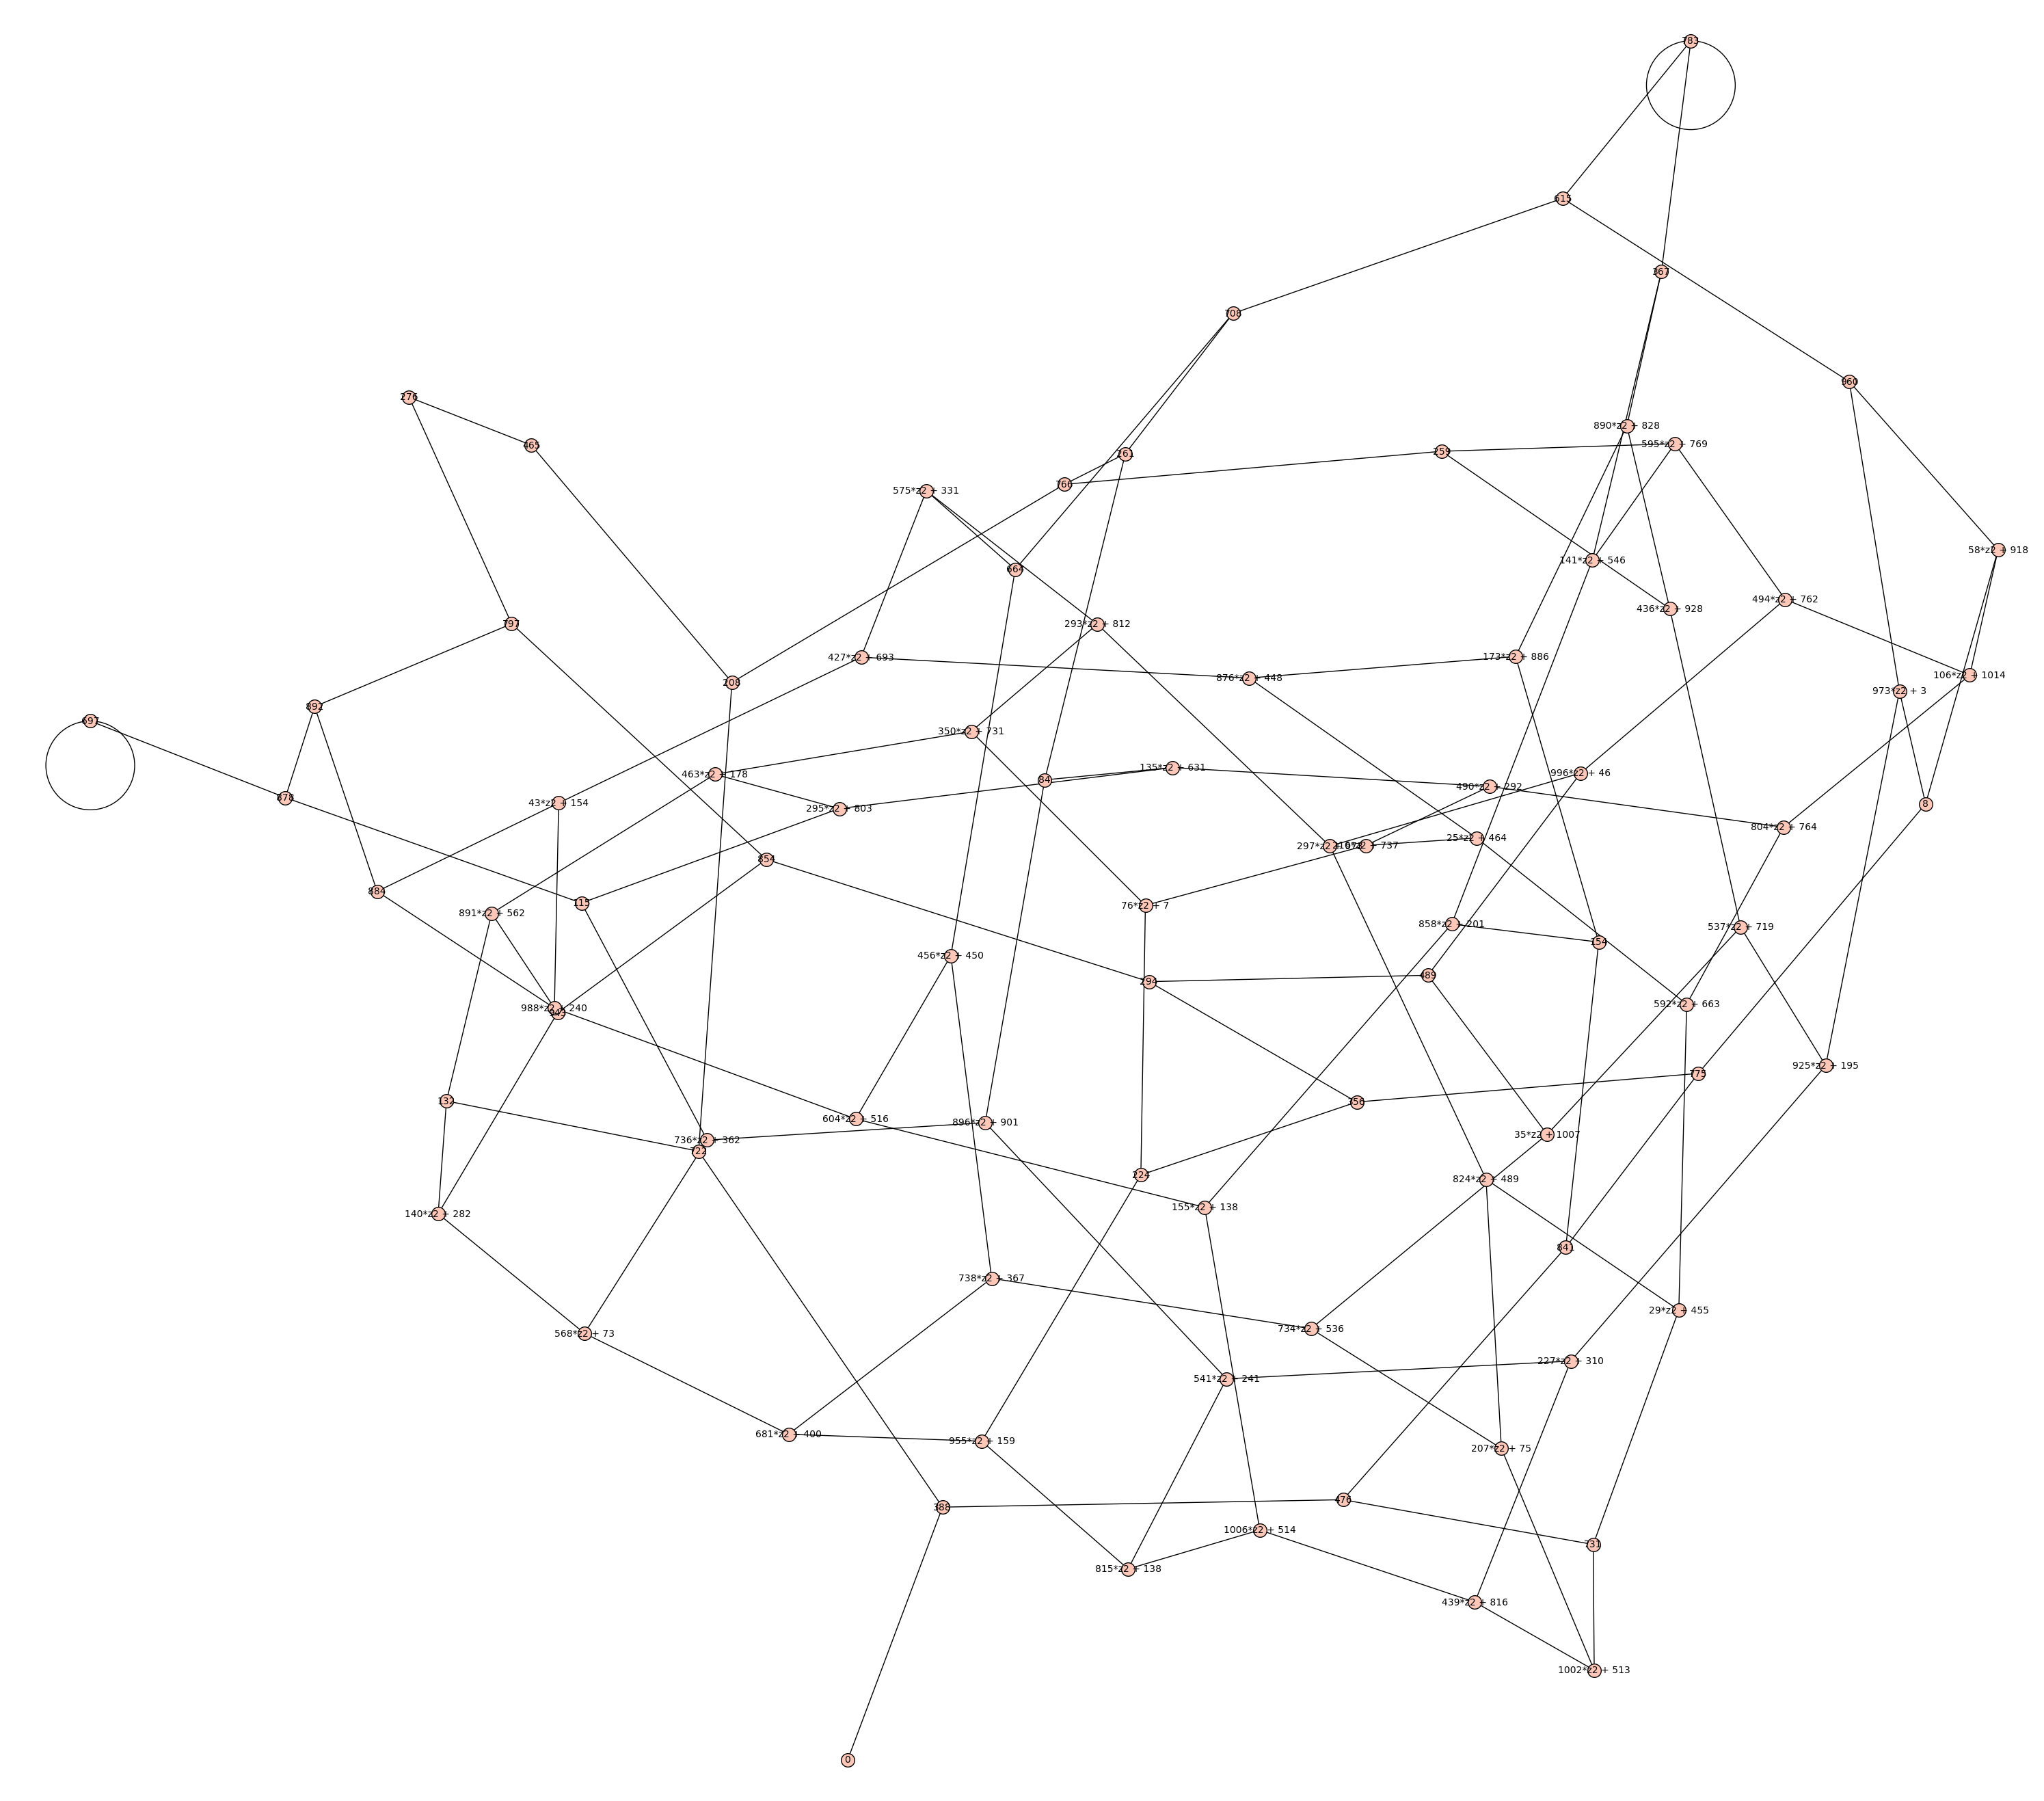

In [24]:
# Generating visualizations of supersingular elliptic curves
General_E=[]
General_V=[]

def parameters_gen(): #generate parameters same as before but with different conditions
    p= 2**10 
    li= 2
    while p % 4 != 3:
        p = next_prime(p) #next prime
    A = -1
    B = 0
    E = EllipticCurve(GF(p),[A,B])
    j_0 = E.j_invariant()
    T = E.trace_of_frobenius()
    D = (T * T) - (4 * p)
    
    h = hilbert_class_polynomial(D) 
    j_invars = h.roots(ring = GF(p), multiplicities = False)
    print('p = ', p)
    print('A = ', A)
    print('B = ', B)
    print('j_0 = ', j_0)
    print('D = ', D)
    print('T = ', T)
    print('li = ', li)
    print('j-invars: ', j_invars)
    print('j_0 in j_invars ', j_0 in j_invars)
    return p, A, B, E, j_0, T, D, cl, li, j_invars


def modular_pol(li, p, j_0):
    
    print('l==',l)
    cur_swap = [j_0]
    j_prev = j_0
    j_cur = j_0
    visited=[]
    Vl=[]
    El=[]
    F = (ClassicalModularPolynomialDatabase()[l]).change_ring(GF(p))
    R.<x> = PolynomialRing(GF(p**2))

    queue=[] #queue of vertices to visit
    queue.append(j_0) #add j_0 to queue
    for ji in queue:
        visited.append(ji) #mark as visited
        Vl.append(ji) #add to V
        ji_neigh = F(ji,x).roots(ring = GF(p**2), multiplicities = False) 
        for i in ji_neigh: #for each neighbour
            if ji<i or ji==i: #if not already added
                Vl.append(i) #add to V
                El.append(ji) #add to E
                El.append(i) #add to E
            if i not in visited and i not in queue: #if not already visited or in queue
                queue.append(i) #add to queue
                print('queue==',queue)
            
    return Vl,El

def visualize_graph(Vl,El,li): 
    print('V==',Vl) #print vertices
    print('E==',El) #print edges
    matplotlib.rcParams['figure.figsize'] = [20, 20] #set figure size

    G = Graph(multiedges=True,sparse=True,loops=True) #create graph object with multiedges, sparse and loops allowed
    i=0
    while i<len(El)-2: #add edges
        G.add_edge(El[i], El[i + 1]) #add edge
        print(El[i], El[i + 1]) #print edge
        print('i=',i) 
        i+=2
    G.add_edge(El[i], El[i + 1]) #add last edge

    G.graphplot(loop_size=0.04).plot(figsize=(30,30)).show() #plot graph with loop size 0.04 and figure size 30x30 and show it

p, A, B, E, j_0, T, D, cl, l, j_invars = parameters_gen()
Vl,El = modular_pol(l, p, j_0) 
visualize_graph(Vl,El,l)